In [54]:
#Read the CSV file
import pandas as pd

housing=pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [55]:
len(housing)

20640

In [56]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [57]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [58]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


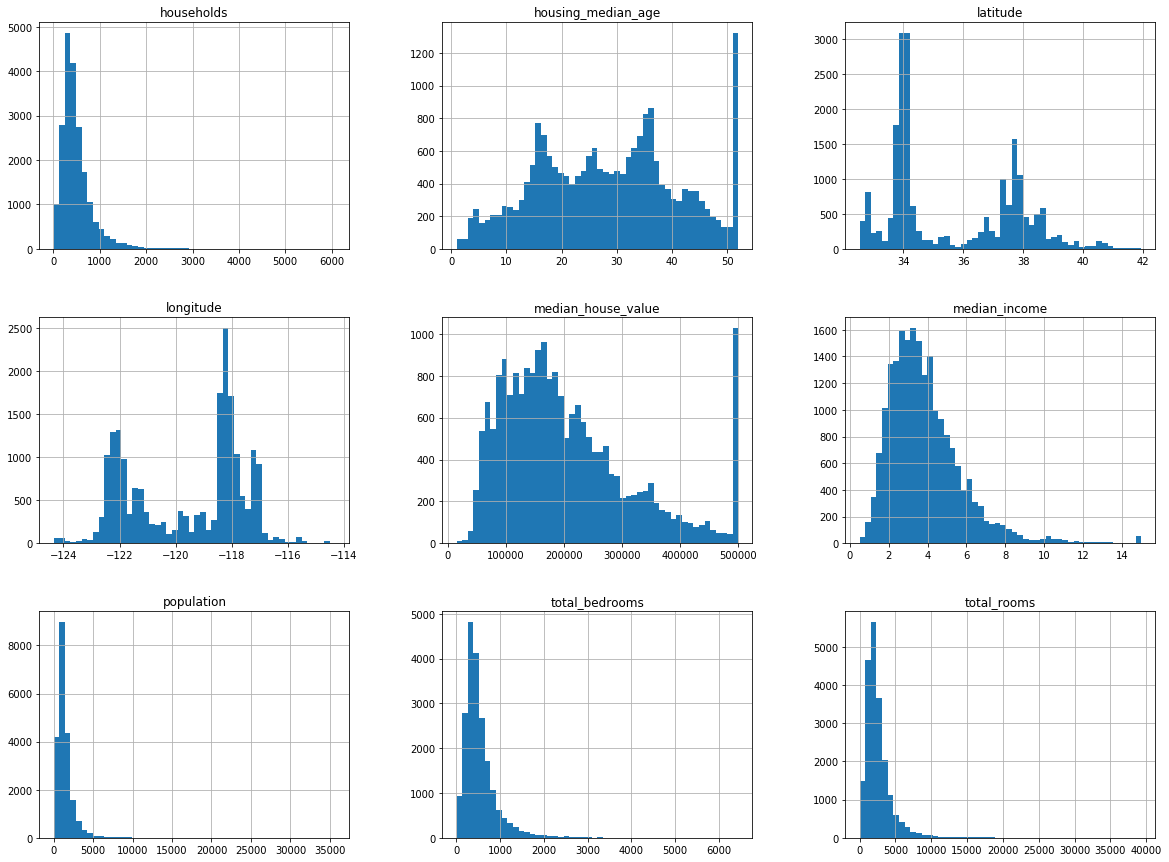

In [59]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()


In [60]:
import numpy as np
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]




train_set,test_set=split_train_test(housing,0.2)

In [61]:
len(train_set)
len(test_set)

4128

In [62]:
from zlib import crc32
def test_set_check(identifier,test_ratio):
  return crc32(np.int64(identifier))& 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]


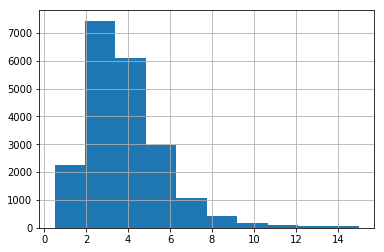

In [63]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.4,random_state=42)
len(test_set)
housing["median_income"].hist()



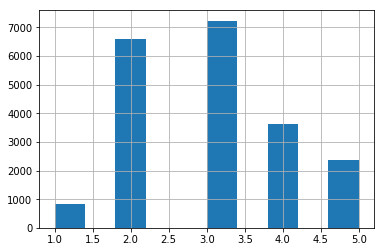

In [64]:
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],
                            labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [65]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]
  

In [66]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [67]:
for set_ in (strat_train_set,strat_test_set):
  set_.drop("income_cat",axis=1,inplace=True)


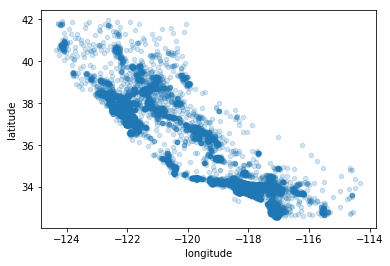

In [68]:
housing1=strat_train_set.copy()
housing1.plot(kind="scatter",x="longitude",y="latitude",alpha=0.2)


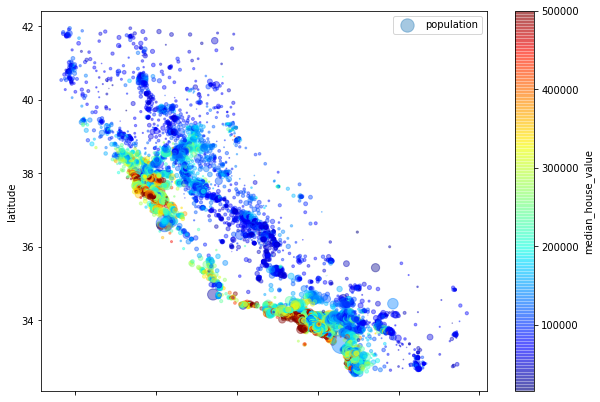

In [69]:
import matplotlib.pyplot as plt

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
              



In [70]:
correlation_matrix=housing1.corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000172C4390>,
      dtype=object)

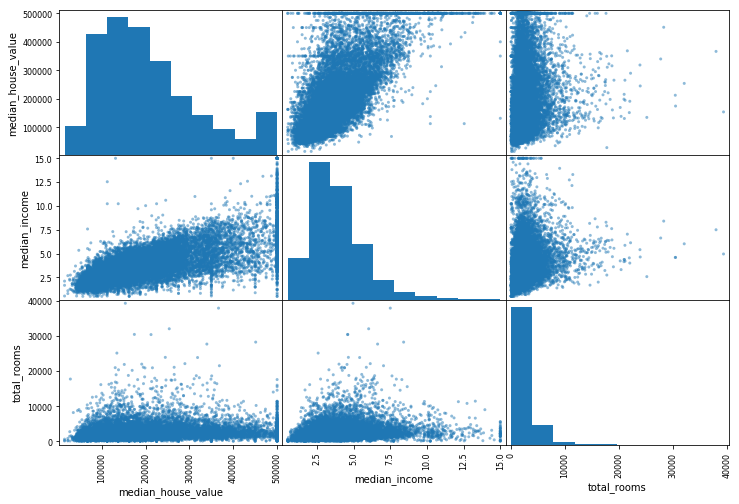

In [71]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms"]
scatter_matrix(housing1[attributes],figsize=(12,8))


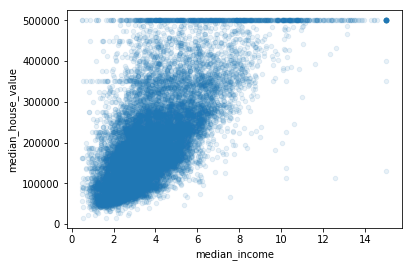

In [72]:
housing1.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)


In [73]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_thousand"]=housing["population"]/housing["households"]
correlation_matrix=housing.corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)


median_house_value         1.000000
median_income              0.688075
rooms_per_household        0.151948
total_rooms                0.134153
housing_median_age         0.105623
households                 0.065843
total_bedrooms             0.049686
population_per_thousand   -0.023737
population                -0.024650
longitude                 -0.045967
latitude                  -0.144160
bedrooms_per_room         -0.255880
Name: median_house_value, dtype: float64

In [74]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [75]:
housing.dropna(subset=["total_bedrooms"]) #option 1
housing.drop("total_bedrooms",axis=1)   #option 2
median=housing["total_bedrooms"].median() #option 3
housing["total_bedrooms"].fillna(median,inplace=True)
housing["total_bedrooms"]


17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
8879      317.0
13685     293.0
4937      465.0
4861      229.0
16365     951.0
19684     559.0
19234     501.0
13956     582.0
2390      495.0
11176     649.0
15614     545.0
2953      251.0
13209     409.0
6569      261.0
5825      913.0
18086     538.0
16718     945.0
13600     278.0
13989     444.0
15168     190.0
6747      563.0
7398      366.0
5562      133.0
16121     416.0
          ...  
12380     767.0
5618       24.0
10060     539.0
18067     438.0
4471      797.0
19786     300.0
9969      393.0
14621    1051.0
579       302.0
11682    1615.0
245       460.0
12130     537.0
16441     544.0
11016     428.0
19934     422.0
1364       34.0
1236      829.0
5364      272.0
11703     300.0
10356     449.0
15270     515.0
3754      373.0
12166     756.0
6003      932.0
7364      212.0
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Le

In [76]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
housing_num=housing.drop("ocean_proximity",axis=1) #calculate median on only numerical attributes. drop ocean_proximity attribute
imputer.fit(housing_num)
imputer.statistics_
housing_num.median().values
  #now use this trained imputer to transform the training set by replacing the missing values by the learned medians
X=imputer.transform(housing_num)



In [77]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [78]:
#convert categorical attributes to numerical values
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]
# to check the categories back ...ordinal_encoder.categories_
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [79]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
#one categroical attribute is 1 all others are zero
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [80]:
#change thenon-zero elements to sparse elements
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [81]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
             return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [82]:
#Feature Scaling One of the most important transformations
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scalar',StandardScaler()),
        ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
                       

In [83]:
#So far, we have handled the categorical columns and the numerical columns separately.
#It would be more convenient to have a single transformer able to handle all columns,
#applying the appropriate transformations to each column. In version 0.20,
#Scikit-Learn introduced the ColumnTransformer for this purpose, and the good news
#is that it works great with Pandas DataFrames
from sklearn.compose import ColumnTransformer
#housing_num = housing.drop("ocean_proximity", axis=1)
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]

full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs)
])

housing_prepared=full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [84]:
#selecting and training a model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
#let us try some instances from training data
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_prepared_data=full_pipeline.transform(some_data)
#Predicting the data
print("predictions: ", lin_reg.predict(some_prepared_data))


predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [86]:
print("labels: ", list(some_labels))

labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [87]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [88]:
some_data1=housing.iloc[:5]
some_labels1=housing_labels.iloc[:5]
some_prepared_data=full_pipeline.transform(some_data1)
print("Predictions: ",lin_reg.predict(some_prepared_data))
print("labels: ", list(some_labels1))


Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [89]:
#Finding the MSE error
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68628.19819848922

In [90]:
#let us train a decision tree model
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [91]:
#evalulating on the training data
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [92]:
#Better Evaluation Using Cross-Validation: Scikit-Learn’s K-fold cross-validation feature
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores


array([69184.46785785, 66843.38321743, 70987.74910498, 68865.34720706,
       70270.17509742, 74948.97044637, 71448.30264334, 70632.92013694,
       75520.08396403, 69931.37653288])

In [93]:
#use a function to look at individual values
def display_scores(scores):
    print("Scores: ",scores)
    print("Mean scores: ", scores.mean())
    print("standard_devaition: ", scores.std())
    
display_scores(tree_rmse_scores)


Scores:  [69184.46785785 66843.38321743 70987.74910498 68865.34720706
 70270.17509742 74948.97044637 71448.30264334 70632.92013694
 75520.08396403 69931.37653288]
Mean scores:  70863.27762082929
standard_devaition:  2509.570333634247


In [94]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean scores:  69052.46136345083
standard_devaition:  2731.674001798347


In [95]:
#trying out the random Forest ..
#Random Forests work by training many Decision Trees on random subsets of
#the features, then averaging out their predictions.
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)



G:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [96]:
#evaluting the random forest on training data
housing_predictions=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,housing_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

22293.17858691257

In [97]:
#cross validating using the forest regression method 
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                          scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
forest_rmse_scores

array([51411.84999061, 51063.11510156, 53295.30510024, 54935.71806453,
       52577.73108046, 55555.20521182, 50938.39135255, 50454.50156399,
       55857.79205887, 51631.37204052])

In [98]:
display_scores(forest_rmse_scores)

Scores:  [51411.84999061 51063.11510156 53295.30510024 54935.71806453
 52577.73108046 55555.20521182 50938.39135255 50454.50156399
 55857.79205887 51631.37204052]
Mean scores:  52772.09815651427
standard_devaition:  1925.2494837863655


In [99]:
#to save a model, import joblib library
#from sklearn.externals import joblib
#joblib.dump(my_model, "my_model.pkl")


In [100]:
#Fine tuning the model
#We can change hyperparameters manually but ita takes so much time.
#better is to use some library i.e GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [101]:
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg, param_grid, cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [102]:
#get the best paramters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [103]:
#get the best estimator
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [104]:
cvres=grid_search.cv_results_
cvres

{'mean_fit_time': array([0.11600657, 0.43642488, 1.2630722 , 0.22561297, 0.67603869,
        2.00531473, 0.28321624, 0.92625289, 2.7039546 , 0.36142063,
        1.23787084, 3.56920414, 0.2108119 , 0.66543803, 0.25401449,
        0.86244936, 0.32961879, 1.04825988]),
 'std_fit_time': array([0.0119002 , 0.02455014, 0.03764794, 0.01207729, 0.00715591,
        0.05684482, 0.01471683, 0.02111411, 0.03955171, 0.0181405 ,
        0.09555317, 0.03365309, 0.01108937, 0.02830431, 0.00695745,
        0.02173227, 0.01336636, 0.02135914]),
 'mean_score_time': array([0.00640025, 0.01720104, 0.04800272, 0.00660024, 0.01700096,
        0.04800272, 0.00720038, 0.01520095, 0.04760275, 0.00640044,
        0.01820102, 0.06040354, 0.00700054, 0.01900101, 0.00680037,
        0.01840105, 0.00660043, 0.0184011 ]),
 'std_score_time': array([0.00135661, 0.00324984, 0.00404987, 0.00048986, 0.00109558,
        0.00328645, 0.00074848, 0.00193916, 0.00249812, 0.00135652,
        0.00193918, 0.03242156, 0.00141438, 

In [106]:
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(forest_reg, param_grid, cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)
#random_search.fit(housing_prepared, housing_labels)
#random_search.fit()

In [110]:
#analyze the best models and their errors
#indicate the relative importance of attributes and making their accurate predictions
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.07150212e-02, 7.39666567e-02, 4.12356074e-02, 1.56140352e-02,
       1.64439256e-02, 1.67422598e-02, 1.59462117e-02, 2.68067452e-01,
       7.79943569e-02, 1.12712023e-01, 9.38806641e-02, 1.43913519e-02,
       1.64961905e-01, 4.71647646e-05, 3.19773871e-03, 4.08362582e-03])

In [111]:
#display the importance of these scores next to their attributes
extra_attribs=["rooms_per_hhold","pop_per_hhold","bedrooms_per_room"]
cat_encoder=full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs=list(cat_encoder.categories_[0])
attributes=num_attribs+extra_attribs+cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.26806745216170597, 'median_income'),
 (0.16496190501061472, 'INLAND'),
 (0.11271202311823744, 'pop_per_hhold'),
 (0.09388066414205266, 'bedrooms_per_room'),
 (0.08071502118418702, 'longitude'),
 (0.07799435686781328, 'rooms_per_hhold'),
 (0.0739666566960622, 'latitude'),
 (0.04123560739184597, 'housing_median_age'),
 (0.01674225975197017, 'population'),
 (0.016443925611012135, 'total_bedrooms'),
 (0.015946211682448076, 'households'),
 (0.01561403518810143, 'total_rooms'),
 (0.014391351902951354, '<1H OCEAN'),
 (0.004083625820376769, 'NEAR OCEAN'),
 (0.003197738705973159, 'NEAR BAY'),
 (4.7164764647665184e-05, 'ISLAND')]

In [ ]:
#Evaluate Your System on the Test Set
#find the best paramters
final_model=grid_search.best_estimator_
#evaluate on test data not fit on the test data, so call tarnsform method
X_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set